## kaggle titanic
- titanic 예제를 활용한  실습

In [1]:
%pwd # 현재 위치

'C:\\Users\\tmznq\\workspace\\ml_scratch\\seoul_coding_academy\\week2'

In [40]:
path = 'C:/Users/tmznq/workspace/ml_scratch/dataset/titanic/test.csv'

```python
f= open(path) # file open
f.readlines() # 전체 lines read
```

In [36]:
f.close() # file close

python의 JSON 모듈을 이용하여 JSON 문자열을 각 line별로 dictionary 객체로 변환할 수 있다.

```python
import json
records = [json.loads(line) for line in open(path, encoding="utf-8")]
```

#### 반복된 파일명을 가진 경우 쓸 수 있는 기술
- ex) 연도별

```python
# 2010 is the last available year right now
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years: #반복된 파일명을 가진 경우 쓸 수 있는 기술
    path = '../datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)
```

#### pandas data 호출

In [41]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)

In [42]:
df = pd.read_csv(path)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
df.shape

(418, 11)

In [43]:
df[['Age']][:5] # 1개의 Key값 slicing / dataframe

,Age
0,34.5
1,47.0
2,62.0
3,27.0
4,22.0


In [44]:
df[['Pclass', 'Name']][:5] # 특정 key값 slicing /dataframe

,Pclass,Name
0,3,"Kelly, Mr. James"
1,3,"Wilkes, Mrs. James (Ellen Needs)"
2,2,"Myles, Mr. Thomas Francis"
3,3,"Wirz, Mr. Albert"
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)"


In [50]:
df['Age'][:10] # 1개의 key값 slicing / Series

0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
5    14.0
6    30.0
7    26.0
8    18.0
9    21.0
Name: Age, dtype: float64

#### 빈도표의 생성
data frame인 frame의 하나의 필드는 Series 객체인데, 이 객체는 value_counts라는 메소드를 가지고 있어서 쉽게 빈도를 구할 수 있다.

>**Series.value_counts**(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
- Returns object containing counts of unique values.

In [69]:
s1 = df['Pclass']
p_s1 = s1.value_counts(normalize=False, sort=True, ascending=False, bins=None)

In [70]:
p_s1

3    218
1    107
2     93
Name: Pclass, dtype: int64

#### 막대 그래프 생성
maptlotlib 라이브러리로 빈도표에 대한 막대그래프를 생성해보자.

In [71]:
plt.figure(figsize=(10, 4))

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

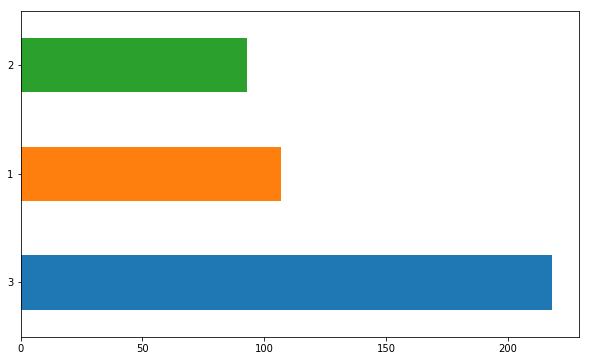

In [72]:
p_s1.plot(kind='barh', rot=0)

#### 정규표현식 활용

u'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

*Series의 하나의 row가 위와 같이 구성 되어 있을 때, Mozilla/5.0 이라는 정보만을 수집하고 싶다면?*

```python
results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]
```

#### cross table 생성

Pclass의 빈도를 남자와 여자 그룹으로 나누어, cross table을 생성하자.
- 필드에 Male이 존재하면 남자로 판단하며
- 필드가 존재하지 않거나, 값이 없으면 제거하자.

>참고로, 필드가 존재하지 않는 라인을 제거하는 것은 dropna이며, 그 뿐아니라 값이 null인 ㅡ 제거하는 것은 notnull 메소드이다.

```python
dropna = Series([1 for x in frame.a.dropna()])
print (dropna.value_counts())
notnull = Series([1 for x in frame.a.notnull()])
print (notnull.value_counts())
```


In [ ]:
import math

In [ ]:
print("11")